In [1]:
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Read the CSV file and extract relevant data
def read_transactions(file_path):
    transactions = []
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            transactions.append({
                'from': row['from'],
                'to': row['to'],
                'value': row['value'],
                'hash': row['hash'],
                'timeStamp': row['timeStamp'],
                'blockNumber': row['blockNumber']
            })
    return transactions

# Create a directed graph from the transactions
def create_graph(transactions):
    G = nx.DiGraph()  # Directed graph since transactions are one-way (from -> to)
    
    for tx in transactions:
        from_addr = tx['from']
        to_addr = tx['to']
        value = float(tx['value'])
        
        # Add nodes (wallet addresses)
        G.add_node(from_addr)
        G.add_node(to_addr)
        
        # Add an edge for each transaction
        G.add_edge(from_addr, to_addr, weight=value)
    
    return G

# Analyze the graph and flag suspicious addresses
def detect_sybil_attack(G):
    flagged_addresses = []
    
    # Degree centrality can help identify addresses that are excessively connected
    in_degree = dict(G.in_degree())
    out_degree = dict(G.out_degree())
    
    # Flag addresses based on custom criteria, like addresses with high degree centrality
    # For example, if an address has many outgoing transactions but not many incoming ones, it might be suspicious
    for node in G.nodes():
        if out_degree[node] > 5 and in_degree[node] == 0:
            flagged_addresses.append(node)
    
    return flagged_addresses

# Visualize the transaction graph
def plot_graph(G, flagged_addresses):
    plt.figure(figsize=(12, 12))
    
    pos = nx.spring_layout(G)
    labels = {node: node[:6] for node in G.nodes()}  # Show only first 6 characters of the address for readability
    
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=8)
    
    # Highlight flagged addresses
    nx.draw_networkx_nodes(G, pos, nodelist=flagged_addresses, node_color='red', node_size=800)
    
    plt.show()

# Main function
def main(file_path):
    # Step 1: Read the transactions from CSV
    transactions = read_transactions(file_path)
    
    # Step 2: Create the graph
    G = create_graph(transactions)
    
    # Step 3: Detect Sybil attacks
    flagged_addresses = detect_sybil_attack(G)
    
    # Step 4: Visualize the graph
    plot_graph(G, flagged_addresses)
    
    # Print the flagged addresses
    print(f"Flagged addresses (potential Sybil attackers Using Graphs): {flagged_addresses}")
    print(f"Flagged addresses (potential Sybil attackers Using Graphs Count: ): {len(flagged_addresses)}")
    


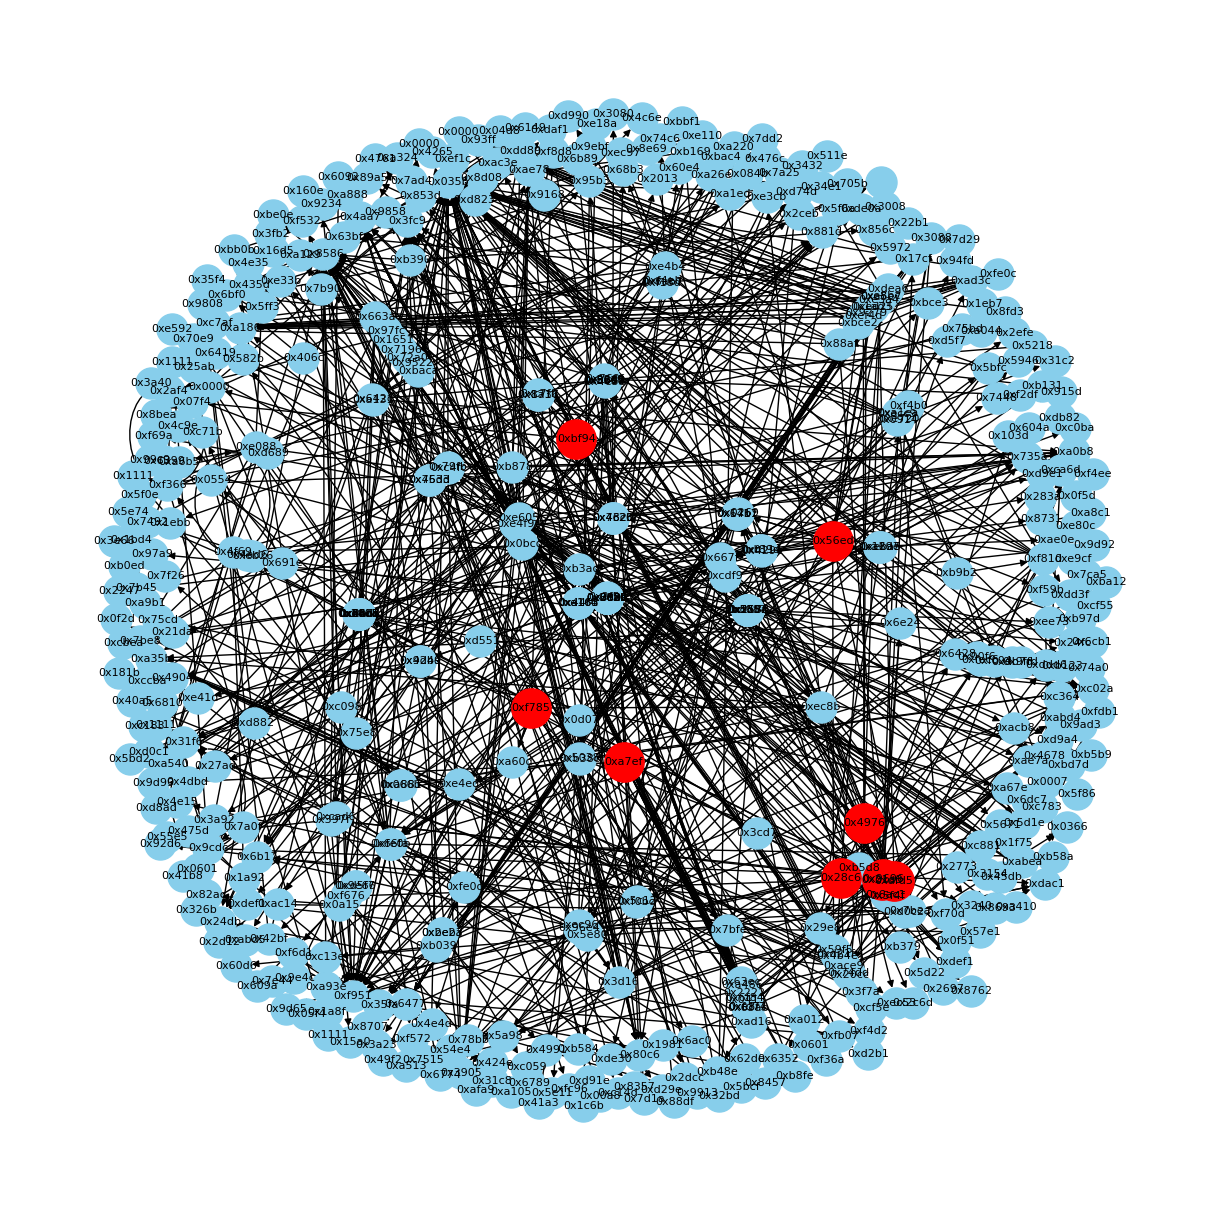

Flagged addresses (potential Sybil attackers Using Graphs): ['0x4976a4a02f38326660d17bf34b431dc6e2eb2327', '0xf7858da8a6617f7c6d0ff2bcafdb6d2eedf64840', '0xdfd5293d8e347dfe59e90efd55b2956a1343963d', '0x21a31ee1afc51d94c2efccaa2092ad1028285549', '0xa7efae728d2936e78bda97dc267687568dd593f3', '0xbf94f0ac752c739f623c463b5210a7fb2cbb420b', '0x28c6c06298d514db089934071355e5743bf21d60', '0x56eddb7aa87536c09ccc2793473599fd21a8b17f', '0x9696f59e4d72e237be84ffd425dcad154bf96976']
Flagged addresses (potential Sybil attackers Using Graphs Count: ): 9


In [3]:
main("ethersccan_2000.csv") #~ 100 Wallet address from the IgenLayer Airdrop

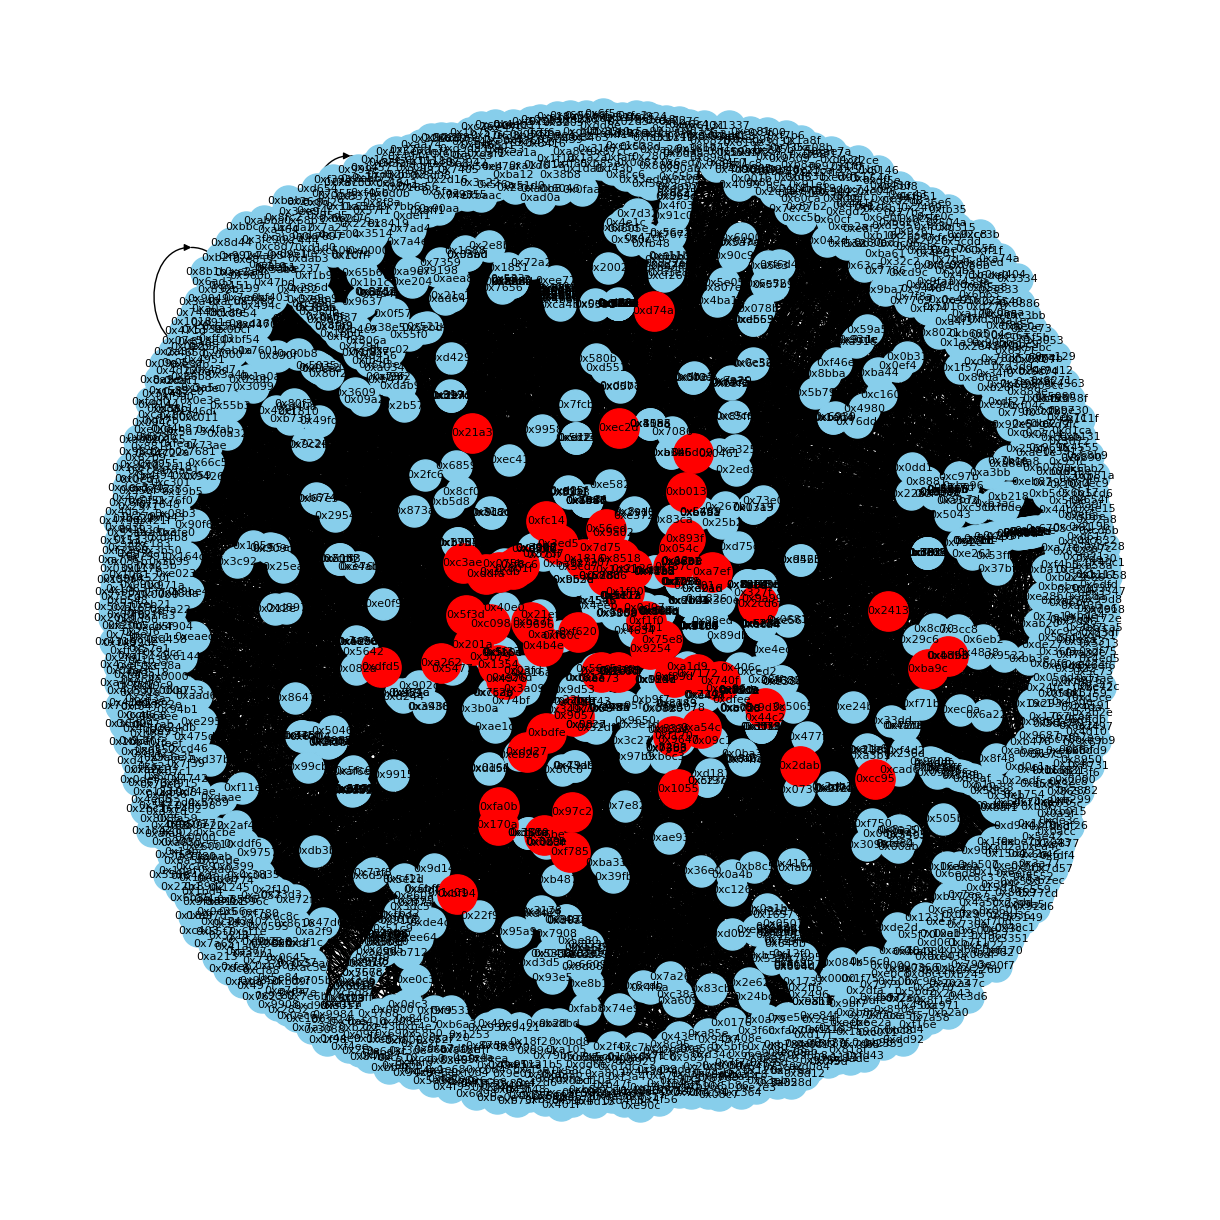

Flagged addresses (potential Sybil attackers Using Graphs): ['0xf7858da8a6617f7c6d0ff2bcafdb6d2eedf64840', '0x28c6c06298d514db089934071355e5743bf21d60', '0xcc9557f04633d82fb6a1741dcec96986cd8689ae', '0xa7efae728d2936e78bda97dc267687568dd593f3', '0xbf94f0ac752c739f623c463b5210a7fb2cbb420b', '0xdfd5293d8e347dfe59e90efd55b2956a1343963d', '0x9696f59e4d72e237be84ffd425dcad154bf96976', '0xf89d7b9c864f589bbf53a82105107622b35eaa40', '0x4976a4a02f38326660d17bf34b431dc6e2eb2327', '0x21a31ee1afc51d94c2efccaa2092ad1028285549', '0x56eddb7aa87536c09ccc2793473599fd21a8b17f', '0x4b4e14a3773ee558b6597070797fd51eb48606e5', '0xc3ae71fe59f5133ba180cbbd76536a70dec23d40', '0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740', '0xd74a01dddb07a0035780accd73dca6c584458c02', '0xb013c16a9033104b9967fe8ab5fd1f7ef64eb511', '0x10554042d8e952b0668b1c76634173bd2e9a9922', '0xc098b2a3aa256d2140208c3de6543aaef5cd3a94', '0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88', '0xa2627f6f54e88a674df8e19b7838b7474830dc14', '0x2c6dcf5946b12e52

In [4]:
main("ethersccan.csv") #~ 700 Wallet address from the IgenLayer Airdrop

In [12]:
import pandas as pd
import networkx as nx

# Step 1: Load the CSV file containing wallet transactions
def load_transactions(file_path):
    # Assuming the CSV has columns: from, to, value
    transactions = pd.read_csv(file_path)
    return transactions

# Step 2: Create a directed graph from the transactions
def create_graph(transactions):
    G = nx.DiGraph()  # Directed graph for transactions (from -> to)
    
    # Iterate over each row in the dataframe to create edges
    for _, row in transactions.iterrows():
        from_addr = row['from']
        to_addr = row['to']
        value = float(row['value'])  # Transaction value
        
        # Add an edge for each transaction from 'from' to 'to' with weight as the value
        G.add_edge(from_addr, to_addr, weight=value)
    
    return G

# Step 3: Generate and display the adjacency list
def display_adjacency_list(G):
    adjacency_list = {}
    
    for node in G.nodes():
        # Get the list of neighbors (addresses this node sends transactions to)
        neighbors = list(G.successors(node))  # Successors are the nodes this node points to
        adjacency_list[node] = neighbors
    
    # Display the adjacency list
    for node, neighbors in adjacency_list.items():
        print(f"Wallet Address {node} sends transactions to: {neighbors}")

# Main function to run the workflow
def main(file_path):
    # Step 1: Load the transactions from a CSV file
    transactions = load_transactions(file_path)
    
    # Step 2: Create the transaction graph
    G = create_graph(transactions)
    
    # Step 3: Display the adjacency list
    display_adjacency_list(G)

# Example usage
file_path = 'ethersccan.csv'  # Path to your CSV file
main(file_path)


Wallet Address 0xf726dc178d1a4d9292a8d63f01e0fa0a1235e65c sends transactions to: ['0xd78e2f7328de3d66dec1da43e7474f0fc73ccf66']
Wallet Address 0xd78e2f7328de3d66dec1da43e7474f0fc73ccf66 sends transactions to: ['0x275b69aa7c8c1d648a0557656bce1c286e69a29d', '0xb248d8d69cc9a74afc80f546fc2049f2aaec1975', '0xb2f91964a48c21e3325431a02537c3e02ea2603a', '0x754e697586902a0d42da842bec9bae7b32de63a6', '0x58fee717d64b9cd2eadf321fc6eb5c99ee9c2504', '0x3bdf7200e680fa9a0ed85a312a4cbdcc164c76d3', '0xb8ee423956e752286ed6cab2729001e8de0806e9', '0x96346a7cc7768e07d0e9bde6d22177d10a5e1c91', '0x38e0fcf756d046c4fcc6574f62b34f75d9f7374f', '0x533168e80d28f633c34571052190332493ba49d0', '0xccbe6c55e3fdb607222f31f8a3e3a778f74696e8', '0x9961bfbab74749a8eb1d303dfdfd13b45093ee77', '0x8fc3455ef398d059acd51f32d67deba0346dc3f5', '0x1bc653276cae38733c591c52389e3e00a3e28a32', '0x1d04a9b7f42568ec945dadc2529b879387b4fe8d']
Wallet Address 0x275b69aa7c8c1d648a0557656bce1c286e69a29d sends transactions to: []
Wallet Address 0

In [13]:
import matplotlib.pyplot as plt

# Calculate in-degree and out-degree for each node
in_degrees = dict(G.in_degree())  # Number of transactions received
out_degrees = dict(G.out_degree())  # Number of transactions sent

# Visualize the degree distribution
plt.figure(figsize=(10, 5))
plt.hist(list(out_degrees.values()), bins=50, alpha=0.5, label='Out-Degree')
plt.hist(list(in_degrees.values()), bins=50, alpha=0.5, label='In-Degree')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("In-degree and Out-degree Distribution")
plt.legend()
plt.show()


NameError: name 'G' is not defined

In [14]:
# Calculate centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)

# Sort and print the top 5 wallets by PageRank
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Wallets by PageRank:")
for wallet, rank in top_pagerank:
    print(f"Wallet: {wallet}, PageRank: {rank:.5f}")


NameError: name 'G' is not defined